In [16]:
import csv
from sklearn.naive_bayes import MultinomialNB

# import method for split train/test data set
from sklearn.model_selection import train_test_split

# import method to calculate metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

# initialize the TfidfVectorizer 



with open("indeed_scraped_data_science.csv", "r",encoding="ISO-8859-1") as f:
    reader = csv.reader(f, delimiter=',')
    text = [(row[8]) for row in reader]
    
with open("indeed_scraped_data_science.csv", "r",encoding="ISO-8859-1") as f:
    reader = csv.reader(f, delimiter=',')
    target = [(row[0]) for row in reader]


# convert tuple to list
text=list(text)
#print(len(text))

## all labels
target=list(target)
#print(len(target))

#print(target[0:10])

tfidf_vect = TfidfVectorizer() 

# with stop words removed
#tfidf_vect = TfidfVectorizer(stop_words="english") 

# generate tfidf matrix
dtm= tfidf_vect.fit_transform(text)

print("type of dtm:", type(dtm))
print("size of tfidf matrix:", dtm.shape)

# split dataset into train (70%) and test sets (30%)
X_train, X_test, y_train, y_test = train_test_split(\
                dtm, target, test_size=0.3, random_state=0)

# train a multinomial naive Bayes model using the testing data
clf = MultinomialNB().fit(X_train, y_train)

# predict the news group for the test dataset
predicted=clf.predict(X_test)

# get the list of unique labels
labels=sorted(list(set(target)))

# calculate performance metrics. 
# Support is the number of occurrences of each label

precision, recall, fscore, support=\
     precision_recall_fscore_support(\
     y_test, predicted, labels=labels)

print(labels)
print(precision)
print(recall)
print(fscore)
print(support)

# another way to get all performance metrics
print(classification_report(y_test, predicted, target_names=labels))




type of dtm: <class 'scipy.sparse.csr.csr_matrix'>
size of tfidf matrix: (1818, 29670)
['1', '2', '3']
[ 0.58991228  1.          0.68965517]
[ 0.9676259   0.45522388  0.14925373]
[ 0.73297003  0.62564103  0.24539877]
[278 134 134]
             precision    recall  f1-score   support

          1       0.59      0.97      0.73       278
          2       1.00      0.46      0.63       134
          3       0.69      0.15      0.25       134

avg / total       0.72      0.64      0.59       546



In [10]:
docs_new = ['I\'m a Vice President Vice President Vice President Vice President / Fashion designer of my own company. I design clothing and fashion ranges.','Developed client module to be used in Windows environment in C++, MFC, COM, TCP/IP Sockets', 'Designed and developed a demonstration system that includes all of the options and security features that are available']

#Responsibilities: Costing, estimating and planning projects.
# generate tifid for new documents
X_new_tfidf = tfidf_vect.transform(docs_new)

print(X_new_tfidf.shape)

# predict classes for new documents
predicted = clf.predict(X_new_tfidf)

for idx, doc in enumerate(docs_new):
    print('%r => %s' % (doc, predicted[idx]))

(3, 28026)
"I'm a Vice President Vice President Vice President Vice President / Fashion designer of my own company. I design clothing and fashion ranges." => 3
'Developed client module to be used in Windows environment in C++, MFC, COM, TCP/IP Sockets' => 2
'Designed and developed a demonstration system that includes all of the options and security features that are available' => 1


In [6]:
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np

mlb = MultiLabelBinarizer()
Y=mlb.fit_transform(target)
# check size of indicator matrix
Y.shape
# check classes
mlb.classes_

# check # of samples in each class
np.sum(Y, axis=0)

(1818, 3)

array(['1', '2', '3'], dtype=object)

array([923, 454, 441])

In [11]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [12]:
#####################   CNN
import pandas as pd
import nltk,string
import csv
# Load data

with open("indeed_scraped_data_science.csv", "r",encoding="ISO-8859-1") as f:
    reader = csv.reader(f, delimiter=',')    
    text = [(row[8]) for row in reader]
# tokenize each document into a list of unigrams
# strip punctuations and leading/trailing spaces from unigrams
# only unigrams with 2 or more characters are taken
sentences=[ [token.strip(string.punctuation).strip() \
             for token in nltk.word_tokenize(doc.lower()) \
                 if token not in string.punctuation and \
                 len(token.strip(string.punctuation).strip())>=2]\
             for doc in text]
print(sentences[0:10])

[['description', 'fis', 'provides', 'financial', 'software', 'world-class', 'services', 'and', 'global', 'business', 'solutions', 'let', 'us', 'help', 'you', 'compete', 'and', 'win', 'in', 'today', 'chaotic', 'marketplace', 'fidelity', 'national', 'information', 'services', 'inc', 'better', 'known', 'by', 'the', 'abbreviation', 'fis', 'is', 'an', 'international', 'provider', 'of', 'financial', 'services', 'technology', 'and', 'outsourcing', 'services', 'fis', 'is', 'the', 'world', 'largest', 'global', 'provider', 'dedicated', 'to', 'financial', 'technology', 'solutions', 'fis', 'empowers', 'the', 'financial', 'world', 'with', 'software', 'services', 'consulting', 'and', 'outsourcing', 'solutions', 'focused', 'on', 'retail', 'and', 'institutional', 'banking', 'payments', 'asset', 'and', 'wealth', 'management', 'risk', 'and', 'compliance', 'trade', 'enablement', 'transaction', 'processing', 'and', 'record-keeping', 'responsibilities', 'extracted', 'data', 'from', 'hdfs', 'and', 'prepared

In [13]:
from gensim.models import word2vec
import logging
import pandas as pd

# print out tracking information
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', \
                    level=logging.INFO)

wv_model = word2vec.Word2Vec(sentences, min_count=5, size=200, window=5, workers=4 )

2018-04-26 01:31:10,357 : INFO : collecting all words and their counts
2018-04-26 01:31:10,359 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-04-26 01:31:10,593 : INFO : collected 44399 word types from a corpus of 1026764 raw words and 1818 sentences
2018-04-26 01:31:10,594 : INFO : Loading a fresh vocabulary
2018-04-26 01:31:10,681 : INFO : min_count=5 retains 10583 unique words (23% of original 44399, drops 33816)
2018-04-26 01:31:10,682 : INFO : min_count=5 leaves 970554 word corpus (94% of original 1026764, drops 56210)
2018-04-26 01:31:10,738 : INFO : deleting the raw counts dictionary of 44399 items
2018-04-26 01:31:10,747 : INFO : sample=0.001 downsamples 31 most-common words
2018-04-26 01:31:10,748 : INFO : downsampling leaves estimated 777965 word corpus (80.2% of prior 970554)
2018-04-26 01:31:10,807 : INFO : estimated required memory for 10583 words and 200 dimensions: 22224300 bytes
2018-04-26 01:31:10,809 : INFO : resetting layer weights
20

In [14]:
from gensim.models.doc2vec import TaggedDocument

docs=[TaggedDocument(sentences[i], [str(i)]) for i in range(len(sentences)) ]

In [21]:
from keras.layers import Embedding, Dense, Conv1D, MaxPooling1D, \
Dropout, Activation, Input, Flatten, Concatenate
from keras.models import Model
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ModelCheckpoint
              
def cnn_model(FILTER_SIZES, \
              # filter sizes as a list
              MAX_NB_WORDS, \
              # total number of words
              MAX_DOC_LEN, \
              # max words in a doc
              EMBEDDING_DIM=200, \
              # word vector dimension
              NUM_FILTERS=64, \
              # number of filters for all size
              DROP_OUT=0.5, \
              # dropout rate
              NUM_OUTPUT_UNITS=1, \
              # number of output units
              NUM_DENSE_UNITS=100,\
              # number of units in dense layer
              PRETRAINED_WORD_VECTOR=None,\
              # Whether to use pretrained word vectors
              LAM=0.0):            
              # regularization coefficient
    
    main_input = Input(shape=(MAX_DOC_LEN,), \
                       dtype='int32', name='main_input')
    
    if PRETRAINED_WORD_VECTOR is not None:
        embed_1 = Embedding(input_dim=MAX_NB_WORDS+1, \
                        output_dim=EMBEDDING_DIM, \
                        input_length=MAX_DOC_LEN, \
                        weights=[PRETRAINED_WORD_VECTOR],\
                        trainable=False,\
                        name='embedding')(main_input)
    else:
        embed_1 = Embedding(input_dim=MAX_NB_WORDS+1, \
                        output_dim=EMBEDDING_DIM, \
                        input_length=MAX_DOC_LEN, \
                        name='embedding')(main_input)
    # add convolution-pooling-flat block
    conv_blocks = []
    for f in FILTER_SIZES:
        conv = Conv1D(filters=NUM_FILTERS, kernel_size=f, \
                      activation='relu', name='conv_'+str(f))(embed_1)
        conv = MaxPooling1D(MAX_DOC_LEN-f+1, name='max_'+str(f))(conv)
        conv = Flatten(name='flat_'+str(f))(conv)
        conv_blocks.append(conv)
    
    if len(conv_blocks)>1:
        z=Concatenate(name='concate')(conv_blocks)
    else:
        z=conv_blocks[0]
        
    drop=Dropout(rate=DROP_OUT, name='dropout')(z)

    dense = Dense(NUM_DENSE_UNITS, activation='relu',\
                    kernel_regularizer=l2(LAM),name='dense')(drop)
    preds = Dense(NUM_OUTPUT_UNITS, activation='sigmoid', name='output')(dense)
    model = Model(inputs=main_input, outputs=preds)
    
    model.compile(loss="binary_crossentropy", \
              optimizer="adam", metrics=["accuracy"]) 
    
    return model

In [23]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# the file path to save best model
BEST_MODEL_FILEPATH="best_model"

# define early stopping based on validation loss
# if validation loss is not improved in 
# an iteration compared with the previous one, 
# stop training (i.e. patience=0). 
# mode='min' indicate the loss needs to decrease 
earlyStopping=EarlyStopping(monitor='val_loss', \
                            patience=0, verbose=2, \
                            mode='min')

# define checkpoint to save best model
# which has max. validation acc
checkpoint = ModelCheckpoint(BEST_MODEL_FILEPATH, \
                             monitor='val_acc', \
                             verbose=2, \
                             save_best_only=True, \
                             mode='max')

# compile model
model.compile(loss="binary_crossentropy", \
              optimizer="adam", metrics=["accuracy"])


In [18]:
from sklearn.preprocessing import MultiLabelBinarizer
from numpy.random import shuffle

mlb = MultiLabelBinarizer()
Y=mlb.fit_transform(target)  # instead of label it is target
# check size of indicator matrix
Y.shape
# check classes
mlb.classes_
# check # of samples in each class
np.sum(Y, axis=0)

(1818, 3)

array(['1', '2', '3'], dtype=object)

array([923, 454, 441])

In [19]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
 
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
 
import numpy as np

# get a Keras tokenizer

MAX_NB_WORDS=8000
# documents are quite long in the dataset
MAX_DOC_LEN=1000

tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(text)
voc=tokenizer.word_index
# convert each document to a list of word index as a sequence
sequences = tokenizer.texts_to_sequences(text)
# get the mapping between words to word index

# pad all sequences into the same length (the longest)
padded_sequences = pad_sequences(sequences, \
                                 maxlen=MAX_DOC_LEN, \
                                 padding='post', truncating='post')

#print(padded_sequences[0])


EMBEDDING_DIM=200
# get a Keras tokenizer

MAX_NB_WORDS=8000
# documents are quite long in the dataset
MAX_DOC_LEN=1000

tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(text)
# tokenizer.word_index provides the mapping 
# between a word and word index for all words
NUM_WORDS = min(MAX_NB_WORDS, len(tokenizer.word_index))

# "+1" is for padding symbol
embedding_matrix = np.zeros((NUM_WORDS+1, EMBEDDING_DIM))

for word, i in tokenizer.word_index.items():
    # if word_index is above the max number of words, ignore it
    if i >= NUM_WORDS:
        continue
    if word in wv_model.wv:
        embedding_matrix[i]=wv_model.wv[word]

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from numpy.random import shuffle
EMBEDDING_DIM=200
FILTER_SIZES=[2,3,4]

# set the number of output units
# as the number of classes
#mlb = MultiLabelBinarizer()
output_units_num=len(mlb.classes_)

#Number of filters for each size
num_filters=64

# set the dense units
dense_units_num= num_filters*len(FILTER_SIZES)

BTACH_SIZE = 32
NUM_EPOCHES = 100

# With well trained word vectors, sample size can be reduced
# Assume we only have 500 labeled data
# split dataset into train (70%) and test sets (20%)

padded_sequences.shape
Y.shape

X_train, X_test, Y_train, Y_test = train_test_split(\
                padded_sequences[0:500], Y[0:500], \
                test_size=0.2, random_state=0, shuffle=True)


# create the model with embedding matrix
model=cnn_model(FILTER_SIZES, MAX_NB_WORDS, \
                MAX_DOC_LEN, \
                NUM_FILTERS=num_filters,\
                NUM_OUTPUT_UNITS=output_units_num, \
                NUM_DENSE_UNITS=dense_units_num,\
                PRETRAINED_WORD_VECTOR=embedding_matrix)

earlyStopping=EarlyStopping(monitor='val_loss', patience=1, verbose=2, mode='min')
checkpoint = ModelCheckpoint(BEST_MODEL_FILEPATH, monitor='val_loss', \
                             verbose=2, save_best_only=True, mode='min')
    
training=model.fit(X_train, Y_train, \
          batch_size=BTACH_SIZE, epochs=NUM_EPOCHES, \
          callbacks=[earlyStopping, checkpoint],\
          validation_data=[X_test, Y_test], verbose=2)




(1818, 1000)

(1818, 3)

Train on 400 samples, validate on 100 samples
Epoch 1/100
 - 6s - loss: 0.1164 - acc: 0.9508 - val_loss: 0.0067 - val_acc: 1.0000

Epoch 00001: val_loss improved from inf to 0.00665, saving model to best_model
Epoch 2/100
 - 6s - loss: 0.0098 - acc: 1.0000 - val_loss: 0.0064 - val_acc: 1.0000

Epoch 00002: val_loss improved from 0.00665 to 0.00637, saving model to best_model
Epoch 3/100
 - 7s - loss: 0.0094 - acc: 1.0000 - val_loss: 0.0062 - val_acc: 1.0000

Epoch 00003: val_loss improved from 0.00637 to 0.00619, saving model to best_model
Epoch 4/100
 - 8s - loss: 0.0092 - acc: 1.0000 - val_loss: 0.0060 - val_acc: 1.0000

Epoch 00004: val_loss improved from 0.00619 to 0.00601, saving model to best_model
Epoch 5/100
 - 7s - loss: 0.0088 - acc: 1.0000 - val_loss: 0.0058 - val_acc: 1.0000

Epoch 00005: val_loss improved from 0.00601 to 0.00584, saving model to best_model
Epoch 6/100
 - 7s - loss: 0.0087 - acc: 1.0000 - val_loss: 0.0056 - val_acc: 1.0000

Epoch 00006: val_loss improved fr


Epoch 00048: val_loss improved from 0.00006 to 0.00005, saving model to best_model
Epoch 49/100
 - 5s - loss: 9.5295e-05 - acc: 1.0000 - val_loss: 5.0659e-05 - val_acc: 1.0000

Epoch 00049: val_loss improved from 0.00005 to 0.00005, saving model to best_model
Epoch 50/100
 - 7s - loss: 9.4997e-05 - acc: 1.0000 - val_loss: 4.7661e-05 - val_acc: 1.0000

Epoch 00050: val_loss improved from 0.00005 to 0.00005, saving model to best_model
Epoch 51/100
 - 5s - loss: 7.9133e-05 - acc: 1.0000 - val_loss: 4.5125e-05 - val_acc: 1.0000

Epoch 00051: val_loss improved from 0.00005 to 0.00005, saving model to best_model
Epoch 52/100
 - 6s - loss: 7.0321e-05 - acc: 1.0000 - val_loss: 4.2881e-05 - val_acc: 1.0000

Epoch 00052: val_loss improved from 0.00005 to 0.00004, saving model to best_model
Epoch 53/100
 - 5s - loss: 6.0589e-05 - acc: 1.0000 - val_loss: 4.0913e-05 - val_acc: 1.0000

Epoch 00053: val_loss improved from 0.00004 to 0.00004, saving model to best_model
Epoch 54/100
 - 5s - loss: 7.82

 - 6s - loss: 1.3228e-05 - acc: 1.0000 - val_loss: 8.9071e-06 - val_acc: 1.0000

Epoch 00095: val_loss improved from 0.00001 to 0.00001, saving model to best_model
Epoch 96/100
 - 6s - loss: 1.7674e-05 - acc: 1.0000 - val_loss: 8.6513e-06 - val_acc: 1.0000

Epoch 00096: val_loss improved from 0.00001 to 0.00001, saving model to best_model
Epoch 97/100
 - 6s - loss: 1.0311e-05 - acc: 1.0000 - val_loss: 8.4193e-06 - val_acc: 1.0000

Epoch 00097: val_loss improved from 0.00001 to 0.00001, saving model to best_model
Epoch 98/100
 - 6s - loss: 1.4824e-05 - acc: 1.0000 - val_loss: 8.2638e-06 - val_acc: 1.0000

Epoch 00098: val_loss improved from 0.00001 to 0.00001, saving model to best_model
Epoch 99/100
 - 6s - loss: 2.1396e-05 - acc: 1.0000 - val_loss: 7.9831e-06 - val_acc: 1.0000

Epoch 00099: val_loss improved from 0.00001 to 0.00001, saving model to best_model
Epoch 100/100
 - 6s - loss: 1.7287e-05 - acc: 1.0000 - val_loss: 7.7515e-06 - val_acc: 1.0000

Epoch 00100: val_loss improved fr

In [29]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         (None, 1000)         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1000, 200)    1600200     main_input[0][0]                 
__________________________________________________________________________________________________
conv_2 (Conv1D)                 (None, 999, 64)      25664       embedding[0][0]                  
__________________________________________________________________________________________________
conv_3 (Conv1D)                 (None, 998, 64)      38464       embedding[0][0]                  
__________________________________________________________________________________________________
conv_4 (Co

In [31]:
from sklearn.metrics import classification_report
pred=model.predict(padded_sequences[500:1000])

Y_pred=np.copy(pred)
Y_pred=np.where(Y_pred>0.5,1,0)

Y_pred[0:10]
Y[500:510]

print(classification_report(Y[500:1000], Y_pred, target_names=mlb.classes_))

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

             precision    recall  f1-score   support

          1       0.85      1.00      0.92       423
          2       0.00      0.00      0.00        77
          3       0.00      0.00      0.00         0

avg / total       0.72      0.85      0.78       500



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


             freq
description   439
fis            24
provides      478
financial     974
software     3322
   word_freq  count   percent    cumsum
0          1   9602  0.313228  0.313228
1          2   6318  0.206100  0.519328
2          3   2402  0.078356  0.597684
3          4   1953  0.063709  0.661393
4          5   1008  0.032882  0.694275


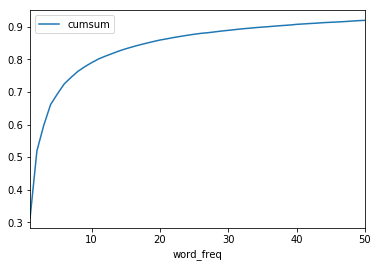

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# get count of each word
df=pd.DataFrame.from_dict(tokenizer.word_counts, orient="index")
df.columns=['freq']
print(df.head())

# get histogram of word count
df=df['freq'].value_counts().reset_index()
df.columns=['word_freq','count']

# sort by word_freq
df=df.sort_values(by='word_freq')

# convert absolute counts to precentage
df['percent']=df['count']/len(tokenizer.word_counts)
# get cumulative percentage
df['cumsum']=df['percent'].cumsum()

print(df.head())

df.iloc[0:50].plot(x='word_freq', y='cumsum');

plt.show();

# if set min count for word to 10, 
# what % of words can be included?
# how many words will be included?
# This is the parameter MAX_NB_WORDS
# tokenizer = Tokenizer(num_words=MAX_NB_WORDS)

     sent_length  counts   percent    cumsum
347            0       2  0.001100  0.001100
0              1      49  0.026953  0.028053
1              2      13  0.007151  0.035204


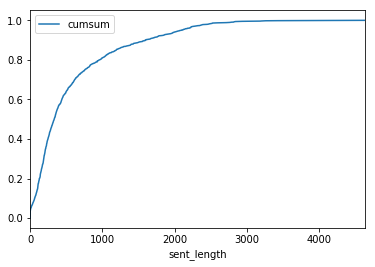

In [33]:
sen_len=pd.Series([len(item) for item in sequences])

# create histogram of sentence length
# the "index" is the sentence length
# "counts" is the count of sentences at a length
df=sen_len.value_counts().reset_index().sort_values(by='index')
df.columns=['sent_length','counts']

# sort by sentence length
# get percentage and cumulative percentage

df['percent']=df['counts']/len(sen_len)
df['cumsum']=df['percent'].cumsum()
print(df.head(3))

# From the plot, 90% sentences have length<500
# so it makes sense to set MAX_DOC_LEN=4~500 
df.plot(x="sent_length", y='cumsum');
plt.show();